In [2]:
import scipy
import numpy
import pyamg
import pylab

In [4]:
stencil = [ [-1,-1,-1],[-1,8,-1],[-1,-1,-1] ]
A = pyamg.gallery.stencil_grid(stencil, (1000,1000), dtype=float, format='csr')

In [6]:
A.nnz       # Number of nonzeros
A.shape     # Matrix dimensions
A.tocsr()   # Return A in Compressed Sparse Row (CSR)
A.tocsc()   # Return A in Compressed Sparse Column (CSC)
A.tocoo()   # Return A in Coordinate (COO) format
A.T         # Return the transpose of A

<1000000x1000000 sparse matrix of type '<class 'numpy.float64'>'
	with 8988004 stored elements in Compressed Sparse Column format>

In [7]:
Agg = pyamg.aggregation.standard_aggregation(A)

In [8]:
B = numpy.ones((A.shape[0],1))
ml = pyamg.smoothed_aggregation_solver(A,B,max_coarse=10)

In [9]:
print(ml)

multilevel_solver
Number of Levels:     7
Operator Complexity:  1.125
Grid Complexity:      1.126
Coarse Solver:        'pinv2'
  level   unknowns     nonzeros
    0      1000000      8988004 [88.87%]
    1       111556      1000000 [ 9.89%]
    2        12544       111556 [ 1.10%]
    3         1444        12544 [ 0.12%]
    4          169         1369 [ 0.01%]
    5           25          169 [ 0.00%]
    6            4           16 [ 0.00%]



In [10]:
residuals=[]
b = scipy.rand(A.shape[0],1)
x0 = scipy.rand(A.shape[0],1)

In [12]:
#solve!
x = ml.solve(b=b,x0=x0,tol=1e-10,residuals=residuals)

In [13]:
(residuals[-1]/residuals[0])**(1.0/len(residuals))

0.15102563220860815

In [14]:
x = ml.solve(b=b,x0=x0,tol=1e-10,residuals=residuals,accel='cg')

In [16]:
(residuals[-1]/residuals[0])**(1.0/len(residuals))

0.051190592709381554

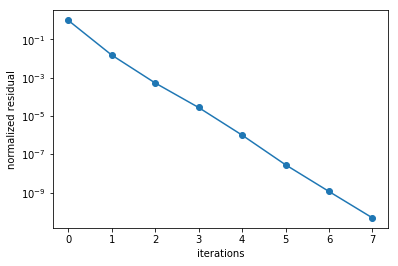

In [17]:
pylab.semilogy(residuals/residuals[0],'o-')
pylab.xlabel('iterations')
pylab.ylabel('normalized residual')
pylab.show()

/Users/julios/anaconda3/anaconda/lib/python3.6/site-packages/pyamg/gallery/stencil.py:114: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  diag[s] = 0


multilevel_solver
Number of Levels:     7
Operator Complexity:  1.125
Grid Complexity:      1.126
Coarse Solver:        'pinv2'
  level   unknowns     nonzeros
    0      1000000      8988004 [88.87%]
    1       111556      1000000 [ 9.89%]
    2        12544       111556 [ 1.10%]
    3         1444        12544 [ 0.12%]
    4          169         1369 [ 0.01%]
    5           25          169 [ 0.00%]
    6            4           16 [ 0.00%]



/Users/julios/anaconda3/anaconda/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


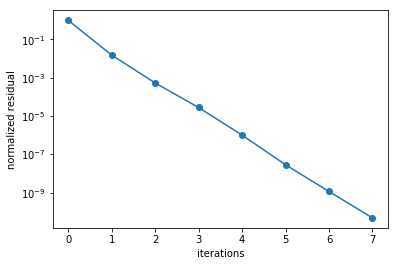

In [21]:
import scipy
import numpy
import pyamg
import pylab
stencil = [ [-1,-1,-1],[-1,8,-1],[-1,-1,-1] ]
A = pyamg.gallery.stencil_grid(stencil, (1000,1000), dtype=float, format='csr')
B = numpy.ones((A.shape[0],1))
ml = pyamg.smoothed_aggregation_solver(A,B,max_coarse=10)
print(ml)
residuals=[]
b = scipy.rand(A.shape[0],1)
x0 = scipy.rand(A.shape[0],1)
x = ml.solve(b=b,x0=x0,tol=1e-10,residuals=residuals)
(residuals[-1]/residuals[0])**(1.0/len(residuals))
x = ml.solve(b=b,x0=x0,tol=1e-10,residuals=residuals,accel='cg')
(residuals[-1]/residuals[0])**(1.0/len(residuals))
pylab.semilogy(residuals/residuals[0],'o-')
pylab.xlabel('iterations')
pylab.ylabel('normalized residual')
pylab.show()